In [2]:
%matplotlib inline

#Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
#point to csvs
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

#load csvs
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [19]:
#inspect cities
sum(city_data_df["type"]=="Rural")

18

In [23]:
#inspect rides

ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [24]:
# merge the dfs

pyber_data_df = pd.merge(ride_data_df,city_data_df,on=["city","city"], how = "left")

pyber_data_df.head(10)

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   
5        South Latoya  2019-03-11 12:26:48   9.52  1994999424437   
6       New Paulville  2019-02-27 11:17:56  43.25   793208410091   
7        Simpsonburgh  2019-04-26 00:43:24  35.98   111953927754   
8     South Karenland  2019-01-08 03:28:48  35.09  7995623208694   
9       North Jasmine  2019-03-09 06:26:29  42.81  5327642267789   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban  
5            10  Urban  
6            44  Urban  
7            21  Urban  
8             4  Urban  
9            33  Urban

In [29]:
#setting up 3 dfs, one for each city type

urban_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
rural_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
suburban_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

rural_df.head()

city                 date   fare        ride_id  \
2250   Randallchester  2019-04-13 11:13:31  43.22  1076079536213   
2251      North Holly  2019-02-02 14:54:00  12.42  1985256326182   
2252      Michaelberg  2019-03-27 18:27:34  54.85  4421836952718   
2253  Lake Latoyabury  2019-02-23 21:12:24  47.90  3269652929887   
2254  Lake Latoyabury  2019-05-06 08:57:56  51.80  4018025271936   

      driver_count   type  
2250             9  Rural  
2251             8  Rural  
2252             6  Rural  
2253             2  Rural  
2254             2  Rural

In [30]:
#calculating rides in each city

urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [32]:
#calculating avg fare in each city

urban_avg_fare = urban_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [33]:
#calculating avg number of drivers in each city

urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

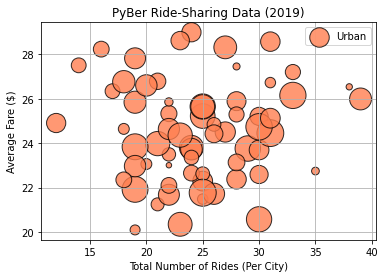

In [43]:
#making urban scatter plot

plt.scatter(urban_ride_count,urban_avg_fare, s = [num*10 for num in urban_driver_count], 
            edgecolor = "k", linewidth=1, color = "coral", alpha = .8, label = "Urban")
plt.legend()

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)


plt.show()

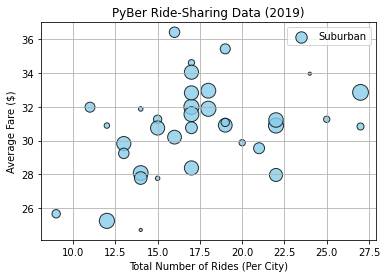

In [46]:
#making suburban scatter plot

plt.scatter(suburban_ride_count,suburban_avg_fare, s = [num*10 for num in suburban_driver_count], 
            edgecolor = "k", linewidth=1, color = "skyblue", alpha = .8, label = "Suburban")
plt.legend()

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)


plt.show()

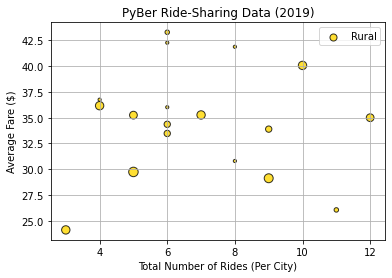

In [51]:
#making rural scatter plot

plt.scatter(rural_ride_count,rural_avg_fare, s = [num*10 for num in rural_driver_count], 
            edgecolor = "k", linewidth=1, color = "gold", alpha = .8, label = "Rural")
plt.legend()

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)


plt.show()

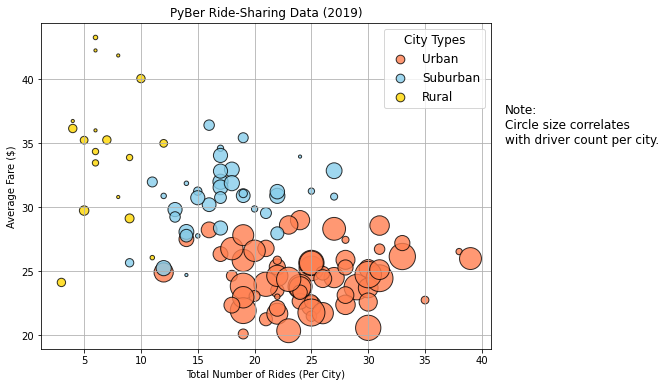

In [92]:
#create the combined chart and adjust right side for note
plt.subplots(figsize=(10, 6))
plt.subplots_adjust(right=0.75)

#add three scatters
plt.scatter(urban_ride_count,urban_avg_fare, s = [num*10 for num in urban_driver_count], 
            edgecolor = "k", linewidth=1, color = "coral", alpha = .8, label = "Urban")

plt.scatter(suburban_ride_count,suburban_avg_fare, s = [num*10 for num in suburban_driver_count], 
            edgecolor = "k", linewidth=1, color = "skyblue", alpha = .8, label = "Suburban")

plt.scatter(rural_ride_count,rural_avg_fare, s = [num*10 for num in rural_driver_count], 
            edgecolor = "k", linewidth=1, color = "gold", alpha = .8, label = "Rural")

#set up legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc = "best",
                 title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#labels and titles
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)

#note
plt.text(42,35,"Note:\nCircle size correlates\nwith driver count per city.", fontsize = "12")


plt.savefig("analysis/Fig1.png", transparent = False, facecolor = "white")
plt.show()